<a href="https://colab.research.google.com/github/mesomesomeso14/optimization_bench/blob/master/skopt_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install scikit-optimize

    100% |████████████████████████████████| 81kB 2.6MB/s 


In [0]:
%matplotlib inline
import numpy as np
from skopt import gp_minimize, gbrt_minimize, forest_minimize
from skopt.space import Real
from skopt.utils import use_named_args
from skopt.plots import plot_convergence, plot_evaluations, plot_objective
import matplotlib.pyplot as plt
import sys
import os

In [0]:
def plotfunc(f,xarea,yarea,xminp,yminp):
  n = 1000
  x = np.linspace(xarea[0],xarea[1],n)
  y = np.linspace(yarea[0],yarea[1],n)
  X,Y = np.meshgrid(x, y)
  Z = f(X,Y)
  fig = plt.figure(figsize=(10,8))
  plt.axis('equal')
  im = plt.pcolor(X, Y, Z, cmap='gnuplot2')
  fig.colorbar(im)
  plt.scatter(xminp,yminp, label='minimum', marker='x', c='r')
  plt.legend()
  plt.contour(X,Y,Z,cmap='Purples')
  plt.tight_layout()

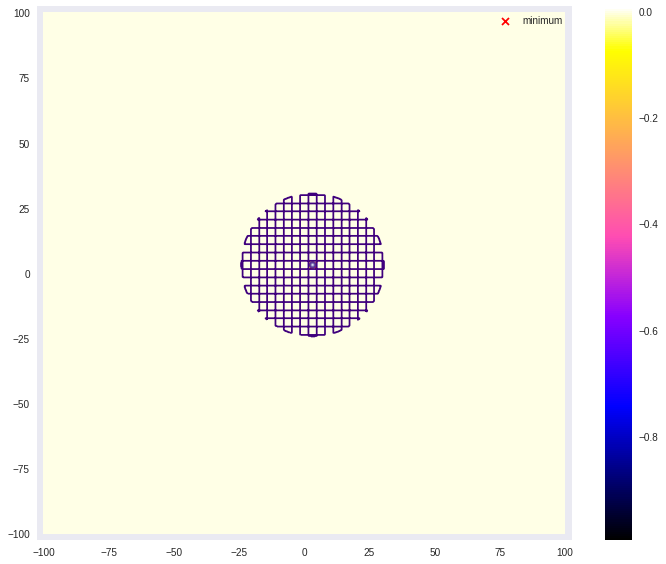

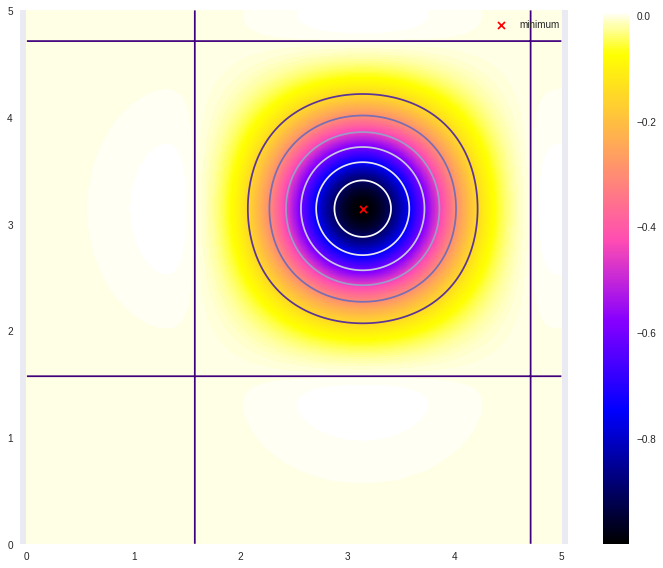

In [143]:
# Easom function
class easom:
  xarea, yarea = [-100, 100], [-100, 100]
  xminp, yminp = [np.pi], [np.pi]
  fmin = -1
  def func(a, b):
    return -1 * np.cos(a) * np.cos(b) * np.exp(-1 * (a - np.pi) ** 2 - (b - np.pi) ** 2)

plotfunc(easom.func, easom.xarea, easom.yarea, easom.xminp, easom.yminp)
plotfunc(easom.func, [0,5], [0,5], easom.xminp, easom.yminp)

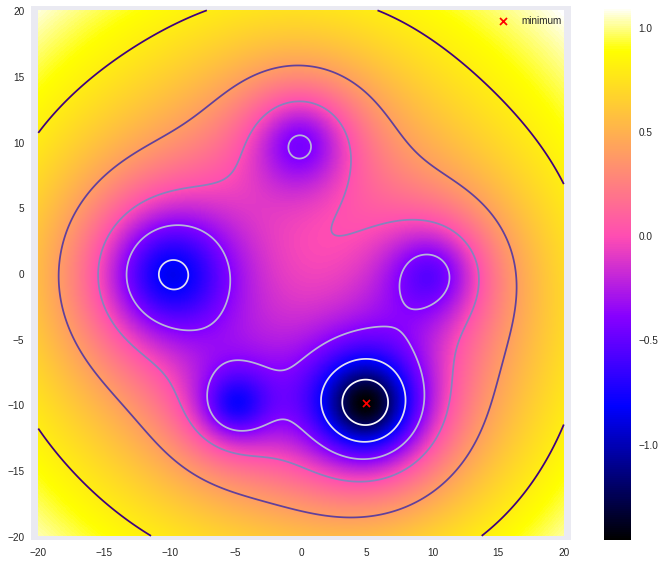

In [142]:
# Five-well potential function
class five_well:
  xarea, yarea = [-20, 20], [-20, 20]
  xminp, yminp = [4.92], [-9.89]
  fmin = -1.4616
  def func(a, b):
      A = 1 / (1 + 0.05 * (a ** 2 + (b - 10) ** 2))
      B = 1 / (1 + 0.05 * ((a - 10) ** 2 + b ** 2))
      C = 1.5 / (1 + 0.03 * ((a + 10) ** 2 + b ** 2))
      D = 2 / (1 + 0.05 * ((a - 5) ** 2 + (b + 10) ** 2))
      E = 1 / (1 + 0.1 * ((a + 5) ** 2 + (b + 10) ** 2))
      F = 0.0001 * (a ** 2 + b ** 2) ** 1.2
      return (1 - A - B - C - D - E) * (1 + F)
    
plotfunc(five_well.func, five_well.xarea, five_well.yarea, five_well.xminp, five_well.yminp)

100.0 %Finish Optimization
     Plot_convergence ...
     Plot_objective ...


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfbb94f7b8>,
      dtype=object)

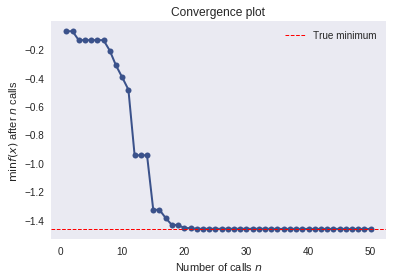

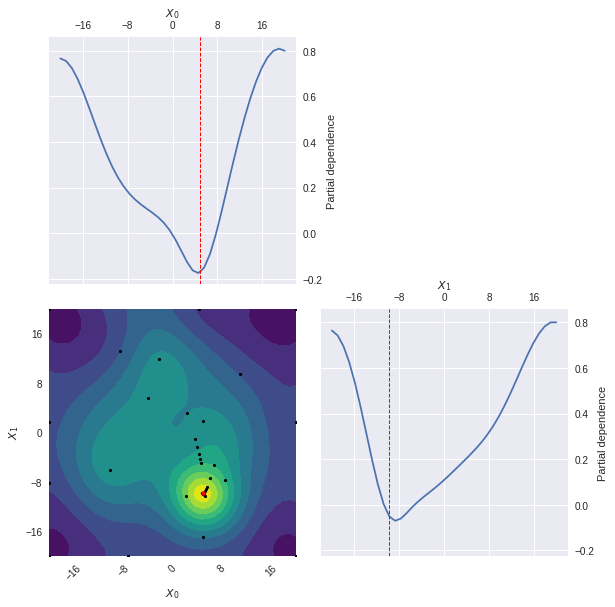

In [166]:
f = five_well

space = [Real(f.xarea[0], f.xarea[1], name='x1'), Real(f.yarea[0], f.yarea[1], name='x2')]
ncall = 50
nrand = 5

@use_named_args(space)
def objective(**params):
    x1 = params['x1']
    x2 = params['x2']
    score = f.func(x1, x2)
    return score

def print_progress(res):
    sys.stdout.write("\r{} %".format(len(res.x_iters) * 100 / ncall))
    sys.stdout.flush()
  
result = gp_minimize(objective, space, n_calls=ncall, acq_func='gp_hedge', n_random_starts=nrand,
                   random_state=220, verbose=False, n_jobs=1, callback=[print_progress])

print('Finish Optimization')
print('     Plot_convergence ...')
plot_convergence(result, true_minimum=f.fmin)

print('     Plot_objective ...')
plot_objective(result, size=4)
